In [91]:
!pip show sqlalchemy

Name: SQLAlchemy
Version: 1.4.45
Summary: Database Abstraction Library
Home-page: https://www.sqlalchemy.org
Author: Mike Bayer
Author-email: mike_mp@zzzcomputing.com
License: MIT
Location: /Users/majosegarciamontes/opt/anaconda3/lib/python3.9/site-packages
Requires: greenlet
Required-by: 


In [92]:
pip install SQLAlchemy==1.4.45

Note: you may need to restart the kernel to use updated packages.


In [9]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [10]:
import numpy as np
import pandas as pd
import datetime as dt

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [12]:
# create engine to hawaii.sqlite   
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [14]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
table_measurement = Base.classes.measurement
table_station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [17]:
## Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
Recent_date=session.query(table_measurement.date).order_by(table_measurement.date.desc()).first()
Recent_date

('2017-08-23',)

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

Recent_date=session.query(table_measurement.date).order_by(table_measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.

latest_date =session.query(table_measurement.date).order_by(table_measurement.date.desc()).first()
print("Latest date : " , latest_date)

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print("Date one year ago is: ", year_ago)
# Perform a query to retrieve the data and precipitation scores
data_prcp = session.query(table_measurement.prcp , table_measurement.date).\
    filter(table_measurement.date > '2016-08-23').\
    order_by(table_measurement.date).all()
data_prcp

Latest date :  ('2017-08-23',)
Date one year ago is:  2016-08-23


[(0.08, '2016-08-24'),
 (2.15, '2016-08-24'),
 (2.28, '2016-08-24'),
 (None, '2016-08-24'),
 (1.22, '2016-08-24'),
 (2.15, '2016-08-24'),
 (1.45, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.21, '2016-08-25'),
 (0.06, '2016-08-25'),
 (0.11, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.03, '2016-08-26'),
 (0.02, '2016-08-26'),
 (0.04, '2016-08-26'),
 (0.0, '2016-08-26'),
 (0.01, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.18, '2016-08-27'),
 (0.02, '2016-08-27'),
 (0.0, '2016-08-27'),
 (0.12, '2016-08-27'),
 (None, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.6, '2016-08-28'),
 (2.07, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.17, '2016-08-29'),
 (0.04, '2016-08-29'),
 (None, '2016-08-29'),
 (0.0, '2016-08-29'),
 (0.35, '2016-08-29'),
 (0.9, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.02, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (

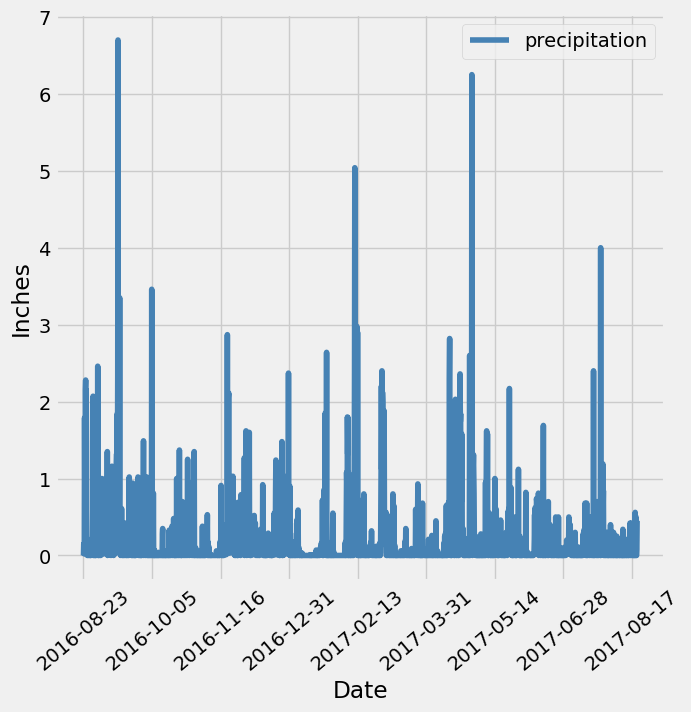

In [34]:
# Save the query results as a Pandas DataFrame and set the index to the date column
data_prcp = session.query(table_measurement.date, table_measurement.prcp).\
    filter(table_measurement.date >= year_ago).\
    order_by(table_measurement.date).all()
df = pd.DataFrame(data_prcp, columns = ['date', 'precipitation'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
df.sort_values(by=['date'], ascending=True)
df=df.dropna()
df.head()

# Use Pandas Plotting with Matplotlib to plot the data
ax=df.plot(color='steelblue',figsize=(7,7))
plt.setp(ax.get_xticklabels(),rotation=40)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.show()


In [40]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [108]:
## Exploratory Station Analysis

In [41]:
# Design a query to calculate the total number stations in the dataset
stations=session.query(table_station.id).count()
stations

9

In [51]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_station = session.query(table_measurement.station, func.count(table_measurement.tobs)).group_by(table_measurement.station).\
               order_by(func.count(table_measurement.tobs).desc()).all()

most_rows = most_active_station[0][0]    
print("The station was",most_rows,"with",most_active_station[0][1],"rows.")
print()
print("Stations:")
for station, count in most_active_station:
    print(station,count)


The station was USC00519281 with 2772 rows.

Stations:
USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [54]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active='USC00519281'
most_active_id=session.query(func.min(table_measurement.tobs), func.max(table_measurement.tobs), func.avg(table_measurement.tobs)).\
    filter(table_measurement.station == most_active).all()
most_active_id

[(54.0, 85.0, 71.66378066378067)]

In [62]:
# Query to pull the last year of precipitation data for the busiest station
temperature = session.query(table_measurement.station, table_measurement.date, table_measurement.tobs).\
    filter(table_measurement.station == most_rows).\
    filter(table_measurement.date > year_ago).\
    order_by(table_measurement.date).all()

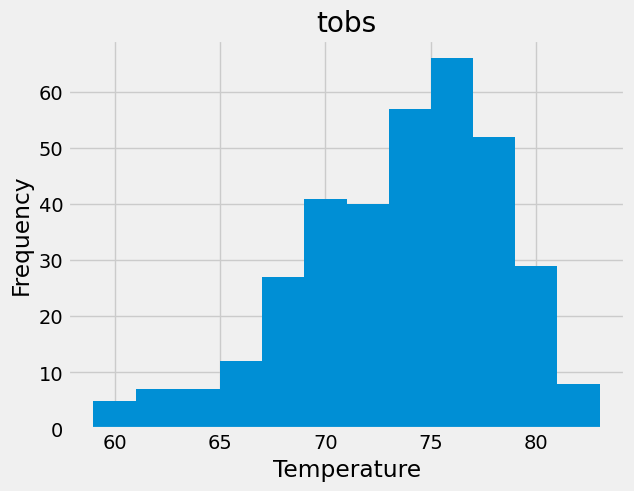

In [71]:
# plot the temperature data in a histogram with 12 bins
temp_df=pd.DataFrame(temperature)
temp_df.hist( bins = 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()


In [72]:
# Close Session
session.close()